# Randomly distribute photons across FoV of 3 EPIC Detectors (PN, MOS-1, and MOS-2)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Create Statistical Summary Table

In [44]:
# Create Summary Table
df = pd.DataFrame(list(), columns = ['Observation Date', 'Uranus Diameter', 
                                     'PN Width', 'PN Height', 'PN Boxes', 'PN FoV Counts', 
                                     'PN Uranus Counts', 'MOS-1 Width', 'MOS-1 Height',
                                     'MOS-1 Boxes', 'MOS-1 FoV Counts', 
                                     'MOS-1 Uranus Counts', 'MOS-2 Width', 'MOS-2 Height',
                                     'MOS-2 Boxes', 'MOS-2 FoV Counts',
                                     'MOS-2 Uranus Counts'])

data = pd.DataFrame([['August 2022', 3.63, 
                      38 * 3.63, 38 * 3.63, 1444, 24995, 20, 
                      12 * 3.63, 12 * 3.63, 144, 1406, 7, 
                      26 * 3.63, 26 * 3.63, 676, 4987, 7], 
                     ['January 2023', 3.64, 
                      38 * 3.64, 39 * 3.64, 1482, 33166, 41, 
                      12 * 3.64, 12 * 3.64, 144, 2082, 11, 
                      26 * 3.64, 27 * 3.64, 702, 6677, 10],
                     ['February 2023', 3.57, 
                      38 * 3.57, 39 * 3.57, 1482, 9931, 14, 
                      12 * 3.57, 12 * 3.57, 144, 503, 5, 
                      26 * 3.57, 26 * 3.57, 676, 2137, 2]], 
                     columns = ['Observation Date', 'Uranus Diameter', 
                                     'PN Width', 'PN Height', 'PN Boxes', 'PN FoV Counts', 
                                     'PN Uranus Counts', 'MOS-1 Width', 'MOS-1 Height',
                                     'MOS-1 Boxes', 'MOS-1 FoV Counts', 
                                     'MOS-1 Uranus Counts', 'MOS-2 Width', 'MOS-2 Height',
                                     'MOS-2 Boxes', 'MOS-2 FoV Counts',
                                     'MOS-2 Uranus Counts'])
df = df._append(data)
df


,Observation Date,Uranus Diameter,PN Width,PN Height,PN Boxes,PN FoV Counts,PN Uranus Counts,MOS-1 Width,MOS-1 Height,MOS-1 Boxes,MOS-1 FoV Counts,MOS-1 Uranus Counts,MOS-2 Width,MOS-2 Height,MOS-2 Boxes,MOS-2 FoV Counts,MOS-2 Uranus Counts
0,August 2022,3.63,137.94,137.94,1444,24995,20,43.56,43.56,144,1406,7,94.38,94.38,676,4987,7
1,January 2023,3.64,138.32,141.96,1482,33166,41,43.68,43.68,144,2082,11,94.64,98.28,702,6677,10
2,February 2023,3.57,135.66,139.23,1482,9931,14,42.84,42.84,144,503,5,92.82,92.82,676,2137,2


In [56]:
# Define a function to create a Monte Carlo simulation 
def monte_carlo(df, n_simulations = int(1e5), ind = 0, plot_ex = False):
    """
    Generate a Monte Carlo Simulation to predict the distribution and count of photons across a detector screen (i.e. PN, MOS-1, or MOS-2).
    Using a uniform distribution, we find the probability of chance occurrence of a certain count of photons in the "Uranus" bin at three 
    various observation times across three detectors on the XMM-Newton instrument. The probability of random occurrence is defined as the probability
    that k photons or more hit the detector screen (where k is the amount of observed/recorded photons per observation date). 

    Parameters
    ----------
    df : pandas DataFrame
        DataFrame containing information at each observation date (i.e. Uranus's angular diamteter, detector dimensions, and observed Uranus counts) 
    n_simulations : integer
        Number of generated simulations 
    ind : integer
        Observation Date (08/22: ind = 0, 01/23: ind = 1, and 02/23: ind = 1)
    plot_ex : boolean
        Request to plot example figure of randomized photon hits on all three detector screens (i.e. visualize one MC simulation)

    Returns
    -------
    n_uranus_pn: list
        List of Uranus Counts in "Uranus" Bin across XMM-PN Detector for each MC Simulation (i.e. len(n_uranus_pn) = n_simulations)
    n_uranus_mos1: list
         List of Uranus Counts in "Uranus" Bin across XMM-MOS_1 Detector for each MC Simulation
    n_uranus_mos2: list
         List of Uranus Counts in "Uranus" Bin across XMM-MOS_2 Detector for each MC Simulation
    """
    n_uranus_pn = []
    n_uranus_mos1 = []
    n_uranus_mos2 = []

    for sim in range(n_simulations):
        # Sanity check: How many simulations have run
        if sim % 1000 == 0:
            print(sim)
        else:
            pass
        
        if plot_ex == True: ## If I want a sample plot of MC simulation
            if sim == 0:
                # New Plot for each simulation
                fig, ax = plt.subplots(1, 3, figsize = (20,10))

                # Plot 1 - PN Detector
                ax[0].set_title("EPIC-pn Detector Random Distribution")
                ax[0].set_xlim(0, df['PN Width'].iloc[ind]) 
                ax[0].set_ylim(0, df['PN Height'].iloc[ind])
                ax[0].axhline(df['PN Height'].iloc[ind], linestyle = '--', color = 'red')
                ax[0].axvline(df['PN Width'].iloc[ind], linestyle = '--', color = 'red')

                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['PN Width'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['PN Height'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins1 = np.linspace(0, df['PN Height'].iloc[ind],  int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins1 = np.linspace(0, df['PN Width'].iloc[ind],  int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                for i in range(len(height_bins1)):
                    ax[0].axvline(height_bins1[i],linestyle = '--', color = 'red' )
                    ax[0].axhline(height_bins1[i],linestyle = '--', color = 'red' )

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins1[np.where(l_xs[i] - width_bins1 >= 0)[0][-1]]
                    y = height_bins1[np.where(l_ys[i] - height_bins1 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df1 = pd.DataFrame(data)
                Z1 = pd.pivot_table(df1, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
                figure1 = ax[0].imshow(Z1[::-1], cmap = 'Greys', extent = [0, max(l_xs), 0, max(l_ys)])
                cbar1 = fig.colorbar(figure1, ax = ax[0], shrink = 0.74)
                cbar1.ax.set_ylabel('Photon Count per Bin', rotation=270, labelpad = 15)

                # Plot points
                #ax[0].scatter(l_xs, l_ys, s = 4, color = 'black')

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin1 = height_bins1[int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin1 = width_bins1[int(int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts1 = Z1[::-1][ur_width_bin1][ur_height_bin1]
                n_uranus_pn.append(uranus_counts1)

                # Plot 2 - MOS-1 Detector
                ax[1].set_title("EPIC MOS-1 Detector Random Distribution")
                ax[1].set_xlim(0, df['MOS-1 Width'].iloc[ind]) 
                ax[1].set_ylim(0, df['MOS-1 Height'].iloc[ind])
                ax[1].axhline(df['MOS-1 Height'].iloc[ind], linestyle = '--', color = 'red')
                ax[1].axvline(df['MOS-1 Width'].iloc[ind], linestyle = '--', color = 'red')

                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['MOS-1 Width'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['MOS-1 Height'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins2 = np.linspace(0, df['MOS-1 Height'].iloc[ind],  int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins2 = np.linspace(0, df['MOS-1 Width'].iloc[ind],  int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                for i in range(len(height_bins2)):
                    ax[1].axvline(height_bins2[i],linestyle = '--', color = 'red' )
                    ax[1].axhline(height_bins2[i],linestyle = '--', color = 'red' )

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins2[np.where(l_xs[i] - width_bins2 >= 0)[0][-1]]
                    y = height_bins2[np.where(l_ys[i] - height_bins2 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df2 = pd.DataFrame(data)
                Z2 = pd.pivot_table(df2, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
                figure2 = ax[1].imshow(Z2[::-1], cmap = 'Greys', extent = [0, max(l_xs), 0, max(l_ys)])
                cbar2 = fig.colorbar(figure2, ax = ax[1], shrink = 0.74)
                cbar2.ax.set_ylabel('Photon Count per Bin', rotation=270, labelpad = 15)

                # Plot points
                #ax[0].scatter(l_xs, l_ys, s = 4, color = 'black')

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin2 = height_bins2[int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin2 = width_bins2[int(int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts2 = Z2[::-1][ur_width_bin2][ur_height_bin2]
                n_uranus_mos1.append(uranus_counts2)

                # Plot 3 - MOS-2 Detector
                ax[2].set_title("EPIC MOS-2 Detector Random Distribution")
                ax[2].set_xlim(0, df['MOS-2 Width'].iloc[ind]) 
                ax[2].set_ylim(0, df['MOS-2 Height'].iloc[ind])
                ax[2].axhline(df['MOS-2 Height'].iloc[ind], linestyle = '--', color = 'red')
                ax[2].axvline(df['MOS-2 Width'].iloc[ind], linestyle = '--', color = 'red')

                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['MOS-2 Width'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['MOS-2 Height'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins3 = np.linspace(0, df['MOS-2 Height'].iloc[ind],  int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins3= np.linspace(0, df['MOS-2 Width'].iloc[ind],  int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                for i in range(len(height_bins3)):
                    ax[2].axvline(height_bins3[i],linestyle = '--', color = 'red' )
                    ax[2].axhline(height_bins3[i],linestyle = '--', color = 'red' )

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins3[np.where(l_xs[i] - width_bins3 >= 0)[0][-1]]
                    y = height_bins3[np.where(l_ys[i] - height_bins3 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df3 = pd.DataFrame(data)
                Z3 = pd.pivot_table(df3, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
                figure3 = ax[2].imshow(Z3[::-1], cmap = 'Greys', extent = [0, max(l_xs), 0, max(l_ys)])
                cbar3 = fig.colorbar(figure3, ax = ax[2], shrink = 0.74)
                cbar3.ax.set_ylabel('Photon Count per Bin', rotation=270, labelpad = 15)

                # Plot points
                #ax[0].scatter(l_xs, l_ys, s = 4, color = 'black')

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin3 = height_bins3[int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin3 = width_bins3[int(int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts3 = Z3[::-1][ur_width_bin3][ur_height_bin3]
                n_uranus_mos2.append(uranus_counts3)

                fig.tight_layout()
                plt.show()
                plt.close()
                
                #print('PN width & height bins are:', int(int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1), int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2))
                #print('MOS-1 width & height bins are:', int(int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1), int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2))
                #print('MOS-2 width & height bins are:', int(int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1), int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2))
            else:
                # PN Detector
                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['PN Width'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['PN Height'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins1 = np.linspace(0, df['PN Height'].iloc[ind],  int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins1 = np.linspace(0, df['PN Width'].iloc[ind],  int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins1[np.where(l_xs[i] - width_bins1 >= 0)[0][-1]]
                    y = height_bins1[np.where(l_ys[i] - height_bins1 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df1 = pd.DataFrame(data)
                Z1 = pd.pivot_table(df1, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin1 = height_bins1[int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin1 = width_bins1[int(int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts1 = Z1[::-1][ur_width_bin1][ur_height_bin1]
                n_uranus_pn.append(uranus_counts1)

                # MOS-1 Detector
                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['MOS-1 Width'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['MOS-1 Height'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins2 = np.linspace(0, df['MOS-1 Height'].iloc[ind],  int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins2 = np.linspace(0, df['MOS-1 Width'].iloc[ind],  int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins2[np.where(l_xs[i] - width_bins2 >= 0)[0][-1]]
                    y = height_bins2[np.where(l_ys[i] - height_bins2 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df2 = pd.DataFrame(data)
                Z2 = pd.pivot_table(df2, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin2 = height_bins2[int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin2 = width_bins2[int(int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts2 = Z2[::-1][ur_width_bin2][ur_height_bin2]
                n_uranus_mos1.append(uranus_counts2)

                # MOS-2 Detector
                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['MOS-2 Width'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['MOS-2 Height'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins3 = np.linspace(0, df['MOS-2 Height'].iloc[ind],  int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins3= np.linspace(0, df['MOS-2 Width'].iloc[ind],  int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins3[np.where(l_xs[i] - width_bins3 >= 0)[0][-1]]
                    y = height_bins3[np.where(l_ys[i] - height_bins3 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df3 = pd.DataFrame(data)
                Z3 = pd.pivot_table(df3, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
                
                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin3 = height_bins3[int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin3 = width_bins3[int(int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts3 = Z3[::-1][ur_width_bin3][ur_height_bin3]
                n_uranus_mos2.append(uranus_counts3)

  
        else: # NO SAMPLE FIGURES
            
            # PN Detector
            # Synthetic Data - Random Points - Uniform Distribution
            l_xs = np.random.uniform(0, df['PN Width'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind]) # Total Photons: Uranus Counts + FoV
            l_ys = np.random.uniform(0, df['PN Height'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])
            
            # Create a DataFrame that sorts x & y values into bins
            height_bins1 = np.linspace(0, df['PN Height'].iloc[ind],  int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
            width_bins1 = np.linspace(0, df['PN Width'].iloc[ind],  int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

            # Assign bin value
            x_sort = []
            y_sort = []
            for i in range(len(l_xs)):
                x = width_bins1[np.where(l_xs[i] - width_bins1 >= 0)[0][-1]]
                y = height_bins1[np.where(l_ys[i] - height_bins1 >= 0)[0][-1]]

                x_sort.append(x)
                y_sort.append(y)

            data = {'X vals': l_xs, 
                    'Y vals': l_ys, 
                    'X bin': x_sort,
                    'Y bin': y_sort,
                    'Sum Values': np.ones(len(l_xs))}

            df1 = pd.DataFrame(data)
            Z1 = pd.pivot_table(df1, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

            # Find Uranus Counts
            # Height bin = Total Height Bins / 2
            # Width bin = (Total Width Bins / 2) + 1
            ur_height_bin1 = height_bins1[int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
            ur_width_bin1 = width_bins1[int(int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
            uranus_counts1 = Z1[::-1][ur_width_bin1][ur_height_bin1]
            n_uranus_pn.append(uranus_counts1)

            # MOS-1 Detector
            # Synthetic Data - Random Points - Uniform Distribution
            l_xs = np.random.uniform(0, df['MOS-1 Width'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])
            l_ys = np.random.uniform(0, df['MOS-1 Height'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])
        
            # Create a DataFrame that sorts x & y values into bins
            height_bins2 = np.linspace(0, df['MOS-1 Height'].iloc[ind],  int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
            width_bins2 = np.linspace(0, df['MOS-1 Width'].iloc[ind],  int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

            # Assign bin value
            x_sort = []
            y_sort = []
            for i in range(len(l_xs)):
                x = width_bins2[np.where(l_xs[i] - width_bins2 >= 0)[0][-1]]
                y = height_bins2[np.where(l_ys[i] - height_bins2 >= 0)[0][-1]]

                x_sort.append(x)
                y_sort.append(y)

            data = {'X vals': l_xs, 
                    'Y vals': l_ys, 
                    'X bin': x_sort,
                    'Y bin': y_sort,
                    'Sum Values': np.ones(len(l_xs))}

            df2 = pd.DataFrame(data)
            Z2 = pd.pivot_table(df2, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

            # Find Uranus Counts
            # Height bin = Total Height Bins / 2
            # Width bin = (Total Width Bins / 2) + 1
            ur_height_bin2 = height_bins2[int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
            ur_width_bin2 = width_bins2[int(int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
            uranus_counts2 = Z2[::-1][ur_width_bin2][ur_height_bin2]
            n_uranus_mos1.append(uranus_counts2)
            
            # MOS-2 Detector
            # Synthetic Data - Random Points - Uniform Distribution
            l_xs = np.random.uniform(0, df['MOS-2 Width'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])
            l_ys = np.random.uniform(0, df['MOS-2 Height'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])

            # Create a DataFrame that sorts x & y values into bins
            height_bins3 = np.linspace(0, df['MOS-2 Height'].iloc[ind],  int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
            width_bins3= np.linspace(0, df['MOS-2 Width'].iloc[ind],  int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

            # Assign bin value
            x_sort = []
            y_sort = []
            for i in range(len(l_xs)):
                x = width_bins3[np.where(l_xs[i] - width_bins3 >= 0)[0][-1]]
                y = height_bins3[np.where(l_ys[i] - height_bins3 >= 0)[0][-1]]

                x_sort.append(x)
                y_sort.append(y)

            data = {'X vals': l_xs, 
                    'Y vals': l_ys, 
                    'X bin': x_sort,
                    'Y bin': y_sort,
                    'Sum Values': np.ones(len(l_xs))}

            df3 = pd.DataFrame(data)
            Z3 = pd.pivot_table(df3, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

            # Find Uranus Counts
            # Height bin = Total Height Bins / 2
            # Width bin = (Total Width Bins / 2) + 1
            ur_height_bin3 = height_bins3[int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
            ur_width_bin3 = width_bins3[int(int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
            uranus_counts3 = Z3[::-1][ur_width_bin3][ur_height_bin3]
            n_uranus_mos2.append(uranus_counts3)

    return n_uranus_pn, n_uranus_mos1, n_uranus_mos2

# Sample Plot from 08/22 for 100 MC Simulations

# 100 Simulations

0


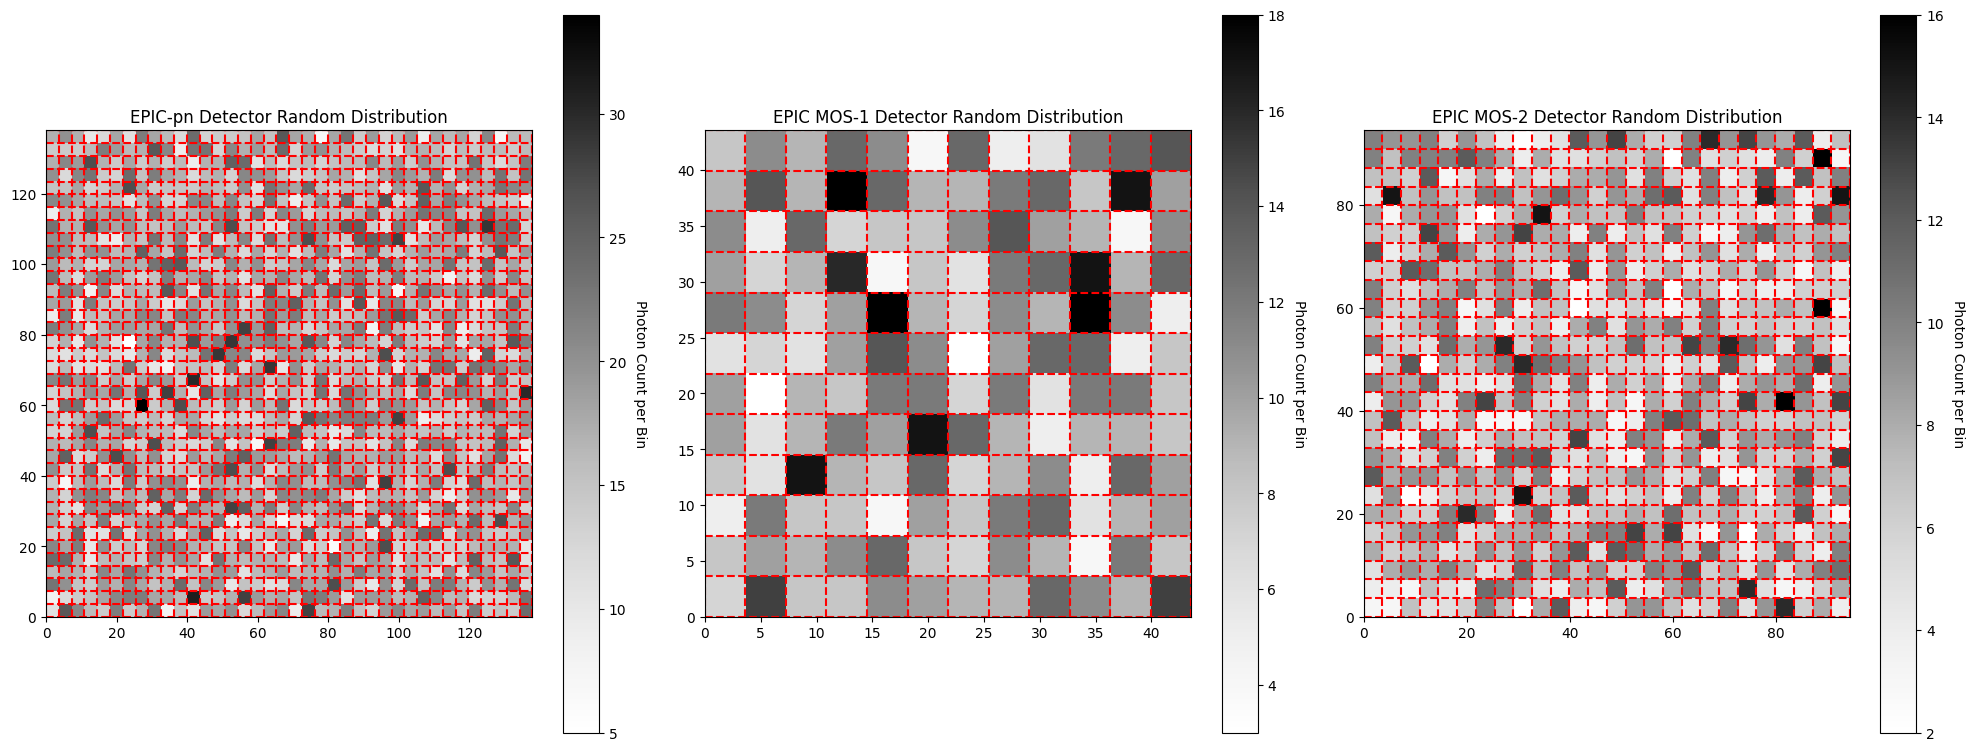

In [58]:
pn_0, mos1_0, mos2_0 = monte_carlo(df, n_simulations=int(100), ind=0, plot_ex=True)

In [31]:
# Append to df - expected counts if random, uniform scattering - 100 SIMULATIONS
row1 = [np.mean(npn_0), np.mean(nmos1_0), np.mean(nmos2_0)]
row2 = [np.mean(npn_1), np.mean(nmos1_1), np.mean(nmos2_1)]
row3 = [np.mean(npn_2), np.mean(nmos1_2), np.mean(nmos2_2)]

df_exp = pd.DataFrame([row1, row2, row3], columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts'])
df_exp

,PN Uranus Expected Counts,MOS-1 Uranus Expected Counts,MOS-2 Uranus Expected Counts
0,16.66,9.82,7.18
1,22.21,14.66,9.61
2,6.63,3.61,2.84


# 200 Simulations EXAMPLE

In [34]:
# Uranus+FoV
npn_0, nmos1_0, nmos2_0 = monte_carlo(df, n_simulations=int(200), ind = 0, plot_ex =False)
npn_1, nmos1_1, nmos2_1 = monte_carlo(df, n_simulations=int(200), ind = 1, plot_ex =False)
npn_2, nmos1_2, nmos2_2 = monte_carlo(df, n_simulations=int(200), ind = 2, plot_ex =False)

0
0
100
0
0
100
0
0
100


In [39]:
# Append to df - expected counts if random, uniform scattering - 200 SIMULATIONS
row1 = [np.mean(npn_0), np.mean(nmos1_0), np.mean(nmos2_0), np.mean(npn_0) + np.mean(nmos1_0) + np.mean(nmos2_0)]
row2 = [np.mean(npn_1), np.mean(nmos1_1), np.mean(nmos2_1), np.mean(npn_1) + np.mean(nmos1_1) + np.mean(nmos2_1)]
row3 = [np.mean(npn_2), np.mean(nmos1_2), np.mean(nmos2_2), np.mean(npn_2) + np.mean(nmos1_2) + np.mean(nmos2_2)]

df_exp = pd.DataFrame([row1, row2, row3], columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts', 'Summed Expected Uranus Counts'])
df_exp

,PN Uranus Expected Counts,MOS-1 Uranus Expected Counts,MOS-2 Uranus Expected Counts,Summed Expected Uranus Counts
0,16.825,9.845,7.365,34.035
1,22.180,14.395,9.490,46.065
2,6.825,3.810,3.015,13.650


In [40]:
# For 08/22
lambda_08_22 = 34.035
k_08_22 = 34

exp_sum = []
for i in range(34):
    ind_exp_sum = (np.exp(-lambda_08_22) * (lambda_08_22 ** (i))) / math.factorial(i)
    exp_sum.append(ind_exp_sum)

print("Here is the list of probability values for 08/22: ", exp_sum)
tot_prob = sum(exp_sum)

cond_prob_08_22 = 1 - tot_prob
cond_prob_08_22

print("The probability that 34 total photons were collected in Uranus window - strictly due to random occurrence is: ", round(cond_prob_08_22 * 100, 3), "%")

Here is the list of probability values for 08/22:  [1.654959264466484e-15, 5.632653856611678e-14, 9.585368700488922e-13, 1.087460079070468e-11, 9.252925947790843e-11, 6.298466692661228e-10, 3.5728052314120807e-09, 1.737148943587288e-08, 7.390483036874166e-08, 2.7948343351112474e-07, 9.51221865955113e-07, 2.943166927980206e-06, 8.347557199483859e-06, 2.1854546868033318e-05, 5.312996447525099e-05, 0.00012055188939434449, 0.0002564364722210321, 0.0005134009018848721, 0.0009707555386473124, 0.0017389297240979619, 0.0029592236579837057, 0.004796056057117877, 0.007419716722909407, 0.010979567768009634, 0.015570399541008664, 0.02119754193512919, 0.027748397683158534, 0.034978396857270395, 0.04251749060847135, 0.049899406650321464, 0.05661087684478969, 0.06215326430362635, 0.06610582345543509, 0.06817914246381009]
The probability that 34 total photons were collected in Uranus window - strictly due to random occurrence is:  52.52 %


In [41]:
# For 01/23
lambda_01_23 = 46.065
k_01_23 = 62

exp_sum = []
for i in range(62):
    ind_exp_sum = (np.exp(-lambda_01_23) * (lambda_01_23 ** (i))) / math.factorial(i)
    exp_sum.append(ind_exp_sum)

print("Here is the list of probability values for 08/22: ", exp_sum)
tot_prob = sum(exp_sum)

cond_prob_01_23 = 1 - tot_prob
cond_prob_01_23

print("The probability that 62 total photons were collected in Uranus window - strictly due to random occurrence is: ", round(cond_prob_01_23 * 100, 3), "%")

Here is the list of probability values for 08/22:  [9.867898895041028e-21, 4.54564762600065e-19, 1.0469762894585995e-17, 1.6076320924636796e-16, 1.8513893084834847e-15, 1.7056849699058344e-14, 1.3095396356452044e-13, 8.617706187999477e-13, 4.962182944377449e-12, 2.5398106370305237e-11, 1.1699637699481108e-10, 4.89948918751452e-10, 1.8807914118571362e-09, 6.664512029784537e-09, 2.1928624760858905e-08, 6.73428066405977e-08, 1.9388414924369577e-07, 5.25369019700638e-07, 1.3445068829172162e-06, 3.259721555872713e-06, 7.507953673563826e-06, 1.646923266536751e-05, 3.448432739682519e-05, 6.906611050151097e-05, 0.0001325637658438376, 0.0002442619949438551, 0.00043276649219571876, 0.0007383477208516957, 0.001214713848608334, 0.001929510118487687, 0.002962762786937843, 0.004402569928396508, 0.0063376369922370345, 0.008846765092345424, 0.011986065705261527, 0.01577537476322492, 0.020185906624109885, 0.025131453747016808, 0.030465274127798137, 0.035984175710180026, 0.04144027635223607, 0.046559666

In [42]:
# For 02/23
lambda_02_23 = 13.650
k_02_23 = 21

exp_sum = []
for i in range(21):
    ind_exp_sum = (np.exp(-lambda_02_23) * (lambda_02_23 ** (i))) / math.factorial(i)
    exp_sum.append(ind_exp_sum)

print("Here is the list of probability values for 08/22: ", exp_sum)
tot_prob = sum(exp_sum)

cond_prob_02_23 = 1 - tot_prob
cond_prob_02_23

print("The probability that 21 total photons were collected in Uranus window - strictly due to random occurrence is: ", round(cond_prob_02_23 * 100, 3), "%")

Here is the list of probability values for 08/22:  [1.179995421003191e-06, 1.6106937496693555e-05, 0.00010992984841493353, 0.0005001808102879476, 0.001706867015107621, 0.004659746951243806, 0.010600924314079658, 0.020671802412455333, 0.03527126286625191, 0.05349474868048207, 0.07302033194885803, 0.09061159373653746, 0.10307068787531137, 0.10822422226907694, 0.10551861671235002, 0.09602194120823852, 0.08191871859327848, 0.06577591228225008, 0.04988006681403965, 0.03583489010587585, 0.02445731249726027]
The probability that 21 total photons were collected in Uranus window - strictly due to random occurrence is:  3.863 %


# 5000 Simulations

In [ ]:
# Just FoV Counts = Total (not completely right, but prob not much of a different w/ Uranus+FoV)
n_pn, n_mos1, n_mos2 = monte_carlo(df, n_simulations=int(5000), ind = 2, plot_ex =False) # ind corresponds to date of observation (i.e. 0 = 08/22, 1 = 01/23, 2 = 02/23)
n_pn_0, n_mos1_0, n_mos2_0 = monte_carlo(df, n_simulations=int(5000), ind = 0, plot_ex =False)
n_pn_1, n_mos1_1, n_mos2_1 = monte_carlo(df, n_simulations=int(5000), ind = 1, plot_ex =False)

In [349]:
# Append to df - expected counts if random, uniform scattering 
row1 = [np.mean(npn_0), np.mean(nmos1_0), np.mean(nmos2_0)]
row2 = [np.mean(npn_1), np.mean(nmos1_1), np.mean(nmos2_1)]
row3 = [np.mean(npn_2), np.mean(nmos1_2), np.mean(nmos2_2)]

df_exp = pd.DataFrame([row1, row2, row3], columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts'])
#df_new = df_new.drop(columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts', 'Summed Expected Uranus Counts'])

#df.insert(7, 'PN Uranus Expected Counts', df_exp['PN Uranus Expected Counts'])
#df_new.insert(19, 'MOS-2 Uranus Expected Counts', df_exp['MOS-2 Uranus Expected Counts'])
df_new['Summed Expected Uranus Counts'] = df_new['PN Uranus Expected Counts'] + df_new['MOS-1 Uranus Expected Counts'] + df_new['MOS-2 Uranus Expected Counts']
df_new

,Observation Date,Uranus Diameter,PN Width,PN Height,PN Boxes,PN FoV Counts,PN Uranus Counts,PN Uranus Expected Counts,MOS-1 Width,MOS-1 Height,...,MOS-1 Uranus Counts,MOS-1 Uranus Expected Counts,MOS-2 Width,MOS-2 Height,MOS-2 Boxes,MOS-2 FoV Counts,MOS-2 Uranus Counts,MOS-2 Uranus Expected Counts,Summed Uranus Counts,Summed Expected Uranus Counts
0,August 2022,3.63,137.94,137.94,1444,24995,20,17.4244,43.56,43.56,...,7,9.7382,94.38,94.38,676,4987,7,7.4484,34,34.6110
1,January 2023,3.64,138.32,141.96,1482,33166,41,22.3842,43.68,43.68,...,11,14.5442,94.64,98.28,702,6677,10,9.5596,62,46.4880
2,February 2023,3.57,135.66,139.23,1482,9931,14,6.7694,42.84,42.84,...,5,3.5156,92.82,92.82,676,2137,2,3.1608,21,13.4458


In [36]:
# 5000 Simulations - Results Summary - Manual Inputs
row1 = [20, 17.4244, 7, 9.7382, 7, 7.4484, 34, 34.6110]
row2 = [41, 22.3842, 11, 14.5442, 10, 9.5596, 62, 46.4880]
row3 = [14, 6.7694, 5, 3.5156, 2, 3.1608, 21, 13.4458]

df_results = pd.DataFrame([row1, row2, row3], columns = ['PN Uranus Counts', 'PN Uranus Expected Counts', 'MOS-1 Uranus Counts', 'MOS-1 Uranus Expected Counts','MOS-2 Uranus Counts', 'MOS-2 Uranus Expected Counts',
                                                         'Summed Uranus Counts (k)', 'Summed Expected Uranus Counts (LAMBDA)'])
df_results


,PN Uranus Counts,PN Uranus Expected Counts,MOS-1 Uranus Counts,MOS-1 Uranus Expected Counts,MOS-2 Uranus Counts,MOS-2 Uranus Expected Counts,Summed Uranus Counts (k),Summed Expected Uranus Counts (LAMBDA)
0,20,17.4244,7,9.7382,7,7.4484,34,34.6110
1,41,22.3842,11,14.5442,10,9.5596,62,46.4880
2,14,6.7694,5,3.5156,2,3.1608,21,13.4458


In [27]:
# For 08/22
lambda_08_22 = 34.6110
k_08_22 = 34

exp_sum = []
for i in range(34):
    ind_exp_sum = (np.exp(-lambda_08_22) * (lambda_08_22 ** (i))) / math.factorial(i)
    exp_sum.append(ind_exp_sum)

print("Here is the list of probability values for 08/22: ", exp_sum)
tot_prob = sum(exp_sum)

cond_prob_08_22 = 1 - tot_prob
cond_prob_08_22

print("The probability that 34 total photons were collected in Uranus window - strictly due to random occurrence is: ", round(cond_prob_08_22 * 100, 3), "%")

Here is the list of probability values for 08/22:  [9.303228476283236e-16, 3.21994040792639e-14, 5.572267872937014e-13, 6.428725445007433e-12, 5.562615409428806e-11, 3.850553638714808e-10, 2.221191866492637e-09, 1.098252452731095e-08, 4.7514519551844904e-08, 1.8272500402321157e-07, 6.324295114247375e-07, 1.989910710901962e-06, 5.739399967918984e-06, 1.5280490176126457e-05, 3.777664610613662e-05, 8.716583322529965e-05, 0.00018855604086005288, 0.0003838890076592523, 0.0007381545802274656, 0.0013446456934869898, 0.0023269766048639104, 0.00383518987004499, 0.006033625299642143, 0.009079556749822354, 0.013093855777837563, 0.018127657693069434, 0.024131398477493314, 0.03093377158164893, 0.03823745600758754, 0.04563574447857282, 0.05264995840492946, 0.058782829366226245, 0.06357914084982676, 0.06668295890767739]
The probability that 34 total photons were collected in Uranus window - strictly due to random occurrence is:  56.407 %


In [26]:
# For 01/23
lambda_01_23 = 46.4880
k_01_23 = 62

exp_sum = []
for i in range(62):
    ind_exp_sum = (np.exp(-lambda_01_23) * (lambda_01_23 ** (i))) / math.factorial(i)
    exp_sum.append(ind_exp_sum)

print("Here is the list of probability values for 08/22: ", exp_sum)
tot_prob = sum(exp_sum)

cond_prob_01_23 = 1 - tot_prob
cond_prob_01_23

print("The probability that 62 total photons were collected in Uranus window - strictly due to random occurrence is: ", round(cond_prob_01_23 * 100, 3), "%")

Here is the list of probability values for 08/22:  [6.464249719848969e-21, 3.005100409763389e-19, 6.98505539245402e-18, 1.082404183614675e-16, 1.2579701421969754e-15, 1.1696103194090597e-14, 9.062140754781396e-14, 6.018297134403964e-13, 3.4972324648021432e-12, 1.8064371424858005e-11, 8.397764987987989e-11, 3.5490481705598696e-10, 1.3749012612748933e-09, 4.916646910319019e-09, 1.6326077254779323e-08, 5.059777862801208e-08, 1.470118458036891e-07, 4.020168639836411e-07, 1.0382755540484172e-06, 2.5403870503475165e-06, 5.904875659827768e-06, 1.3071707603527297e-05, 2.7621706503308048e-05, 5.5829473561990623e-05, 0.00010814169028957585, 0.00020109163592727208, 0.0003595518450379624, 0.000619068376745363, 0.0010278303820763725, 0.001647647544895393, 0.0025531946355699013, 0.0038288036199475347, 0.005562294458878781, 0.007835755903162326, 0.010713782953712064, 0.014230352627204755, 0.018376128692597075, 0.023088364071931156, 0.02824557549936673, 0.03366872599524514, 0.0391297933516739, 0.04436

In [25]:
# For 02/23
lambda_02_23 = 13.4458
k_02_23 = 21

exp_sum = []
for i in range(21):
    ind_exp_sum = (np.exp(-lambda_02_23) * (lambda_02_23 ** (i))) / math.factorial(i)
    exp_sum.append(ind_exp_sum)

print("Here is the list of probability values for 08/22: ", exp_sum)
tot_prob = sum(exp_sum)

cond_prob_02_23 = 1 - tot_prob
cond_prob_02_23

print("The probability that 21 total photons were collected in Uranus window - strictly due to random occurrence is: ", round(cond_prob_02_23 * 100, 3), "%")

Here is the list of probability values for 08/22:  [1.4473156400466231e-06, 1.9460316632938886e-05, 0.00013082976269158483, 0.0005863702743995038, 0.001971054358880212, 0.005300480539726312, 0.011878200206842007, 0.02281598633445089, 0.038347398631969974, 0.0572901613917491, 0.07703120520411799, 0.09415874353941181, 0.10550330282351861, 0.10912125454649743, 0.10480161174152108, 0.09394276741027628, 0.0789459788778183, 0.06244069663502172, 0.04664250660084306, 0.0330076744870324, 0.022190729480887014]
The probability that 21 total photons were collected in Uranus window - strictly due to random occurrence is:  3.387 %


# Additional Code


In [ ]:
# Append to df - expected counts if random, uniform scattering 
row1 = [np.mean(npn_0), np.mean(nmos1_0), np.mean(nmos2_0)]
row2 = [np.mean(npn_1), np.mean(nmos1_1), np.mean(nmos2_1)]
row3 = [np.mean(npn_2), np.mean(nmos1_2), np.mean(nmos2_2)]

df_exp = pd.DataFrame([row1, row2, row3], columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts'])
#df_new = df_new.drop(columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts', 'Summed Expected Uranus Counts'])

#df.insert(7, 'PN Uranus Expected Counts', df_exp['PN Uranus Expected Counts'])
#df_new.insert(19, 'MOS-2 Uranus Expected Counts', df_exp['MOS-2 Uranus Expected Counts'])
df_new['Summed Expected Uranus Counts'] = df_new['PN Uranus Expected Counts'] + df_new['MOS-1 Uranus Expected Counts'] + df_new['MOS-2 Uranus Expected Counts']
df_new

# Generate Random Occurrence Probability - Extra information on 5000 Simulations!

In [345]:
#df_new = df_new.drop(columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts', 'Summed Expected Uranus Counts'])

In [296]:
# Just FoV Counts = Total (not completely right, but prob not much of a different w/ Uranus+FoV)
n_pn, n_mos1, n_mos2 = monte_carlo(df, n_simulations=int(5000), ind = 2, plot_ex =False) # ind corresponds to date of observation (i.e. 0 = 08/22, 1 = 01/23, 2 = 02/23)
n_pn_0, n_mos1_0, n_mos2_0 = monte_carlo(df, n_simulations=int(5000), ind = 0, plot_ex =False)
n_pn_1, n_mos1_1, n_mos2_1 = monte_carlo(df, n_simulations=int(5000), ind = 1, plot_ex =False)

0
1000
2000
3000
4000


In [322]:
# Append to df - expected counts if random, uniform scattering 
row1 = [np.mean(n_pn_0), np.mean(n_mos1_0), np.mean(n_mos2_0)]
row2 = [np.mean(n_pn_1), np.mean(n_mos1_1), np.mean(n_mos2_1)]
row3 = [np.mean(n_pn), np.mean(n_mos1), np.mean(n_mos2)]

df_exp = pd.DataFrame([row1, row2, row3], columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts'])
#df.insert(7, 'PN Uranus Expected Counts', df_exp['PN Uranus Expected Counts'])
df['Summed Uranus Counts'] = df['PN Uranus Counts'] + df['MOS-1 Uranus Counts'] + df['MOS-2 Uranus Counts']
df['Summed Expected Uranus Counts'] = df['PN Uranus Expected Counts'] + df['MOS-1 Uranus Expected Counts'] + df['MOS-2 Uranus Expected Counts']

,Observation Date,Uranus Diameter,PN Width,PN Height,PN Boxes,PN FoV Counts,PN Uranus Counts,PN Uranus Expected Counts,MOS-1 Width,MOS-1 Height,...,MOS-1 Uranus Counts,MOS-1 Uranus Expected Counts,MOS-2 Width,MOS-2 Height,MOS-2 Boxes,MOS-2 FoV Counts,MOS-2 Uranus Counts,MOS-2 Uranus Expected Counts,Summed Uranus Counts,Summed Expected Uranus Counts
0,August 2022,3.63,137.94,137.94,1444,24995,20,17.3350,43.56,43.56,...,7,9.6856,94.38,94.38,676,4987,7,7.3384,34,34.3590
1,January 2023,3.64,138.32,141.96,1482,33166,41,22.2472,43.68,43.68,...,11,14.4244,94.64,98.28,702,6677,10,9.5556,62,46.2272
2,February 2023,3.57,135.66,139.23,1482,9931,14,6.7014,42.84,42.84,...,5,3.5092,92.82,92.82,676,2137,2,3.2146,21,13.4252
